## Import Libraries

In [ ]:
import pandas as pd
import numpy as np
import os
# disable wandb
os.environ['WANDB_DISABLED'] = 'true'

# visualization
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
%matplotlib inline
sns.set(style='whitegrid')

import warnings
warnings.filterwarnings('ignore')

## Load Dataset

In [2]:
df = pd.read_csv('/kaggle/input/gamblingsitesid-txt2/text_ocr.csv')
df

,File Name,Extracted Text,Class
0,0156726.slotslou.sbs.png,HOME jackpotpartycasinoslotsonline — login pr...,judi
1,015eaglegaze.online.png,r #TOGrt AFATC Situs Online Gaming Terbaik Un...,judi
2,016-bar.pro.png,"""€! INFO TERKINI: (TOGEL ONLINE TERBESAR DAN T...",judi
3,016-good.pro.png,Sa TIPE Nomor Ab sernncan 2 Sa HADIAHTOGEL —— ...,judi
4,0164999.slotslou.sbs.png,bet 365 keluaran togel hongkong kemarin HOME ...,judi
...,...,...,...
2564,zenius.net.png,. & ZenNlUS Home Beli Paket Try Out (New) Blog...,non-judi
2565,zigwheels.co.id.png,"373, 7 Jakarta- 21G732515 OX Cari harga, spek ...",non-judi
2566,zinus.com.png,"Flash Sale! Spend $1,000 and save $200 01:03: ...",non-judi
2567,zistop.com.png,"ZisTop OA Search by names, categories —. 88 S...",non-judi


In [3]:
df = df[["Extracted Text", "Class"]]
df

,Extracted Text,Class
0,HOME jackpotpartycasinoslotsonline — login pr...,judi
1,r #TOGrt AFATC Situs Online Gaming Terbaik Un...,judi
2,"""€! INFO TERKINI: (TOGEL ONLINE TERBESAR DAN T...",judi
3,Sa TIPE Nomor Ab sernncan 2 Sa HADIAHTOGEL —— ...,judi
4,bet 365 keluaran togel hongkong kemarin HOME ...,judi
...,...,...
2564,. & ZenNlUS Home Beli Paket Try Out (New) Blog...,non-judi
2565,"373, 7 Jakarta- 21G732515 OX Cari harga, spek ...",non-judi
2566,"Flash Sale! Spend $1,000 and save $200 01:03: ...",non-judi
2567,"ZisTop OA Search by names, categories —. 88 S...",non-judi


## Data Cleaning

In [4]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2569 entries, 0 to 2568
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Extracted Text  2493 non-null   object
 1   Class           2569 non-null   object
dtypes: object(2)
memory usage: 40.3+ KB
None


### Remove Missing Values

In [5]:
# Missing Values Info
print('Count of Missing Values:\n',df.isna().sum())

Count of Missing Values:
 Extracted Text    76
Class              0
dtype: int64


In [6]:
# Menghapus baris dengan missing values
df = df.dropna()

### Remove Duplicated Values

In [7]:
# Duplicated Data
print('Count of Duplicated Data: ', df.duplicated().sum())
df[df.duplicated() == True]

Count of Duplicated Data:  14


,Extracted Text,Class
66,DEPOSIT VIA Kami menggunakan cookies untuk me...,judi
83,RTP SLOT RESMIL LANGSUNG DARI PUSAT Non Red ...,judi
285,Sign up for Tumblr Sign up Discover more blogs...,judi
684,ADWAL RILIS K... TURNAMEN PG SOFT MINGG.. Bonu...,judi
817,Kategori v (60202388 GO Pulsak Tagihan — WI Vo...,judi
918,TURNAMEN PG SOFT MINGG.. Bonus Setiap Hari - ...,judi
1737,r You pulan konten yang KASKUS liain khusus b...,non-judi
1773,PW) Kinobi (Solusi v Resources v Kinobi School...,non-judi
1850,Discover products D LiveChat Product xv Prici...,non-judi
2062,Bisnis Kecantikan Keuangan Otomotif — Pendidik...,non-judi


In [8]:
df.drop_duplicates(inplace=True)

### Text Cleaning

In [9]:
pre_df = df.copy()

In [10]:
import re
from collections import Counter

def clean_text(data):
    temp_text = []
    all_words = []
    
    for text in data:
        # removal of links[https://blabala.com]
        text = re.sub(r"http\S+", "", text)
        # removal of new line
        text = re.sub('\n', '', text)
        # removal of punctuations and numbers
        text = re.sub("[^a-zA-Z^']", " ", text)
        text = re.sub(" {2,}", " ", text)
        # remove leading and trailing whitespace
        text = text.strip()
        # remove whitespace with a single space
        text = re.sub(r'\s+', ' ', text)
        # Remove 1 or 2 letter words
        text = re.sub(r'\b\w{1,2}\b', '', text)
        # Remove words >20 characters
        text = re.sub(r'\b\w{20,}\b', '', text)  
        # convert text to Lowercase
        text = text.lower();

        temp_text.append(text)
        all_words.extend(text.split())

    # Hitung frekuensi kata
    word_counts = Counter(all_words)
    rare_words = {word for word, count in word_counts.items() if count == 1}  # Kata yang muncul 1x

    # Hapus kata yang jarang muncul
    final_texts = []
    for text in temp_text:
        words = text.split()
        cleaned_words = [word for word in words if word not in rare_words]
        final_texts.append(" ".join(cleaned_words))

    return final_texts

In [11]:
pre_df['cleaned_text']=clean_text(pre_df['Extracted Text'])
pre_df.head()

,Extracted Text,Class,cleaned_text
0,HOME jackpotpartycasinoslotsonline — login pr...,judi,home login bigwin jackpot codes
1,r #TOGrt AFATC Situs Online Gaming Terbaik Un...,judi,situs online gaming terbaik untuk gamers langs...
2,"""€! INFO TERKINI: (TOGEL ONLINE TERBESAR DAN T...",judi,info terkini togel online terbesar dan terpeca...
3,Sa TIPE Nomor Ab sernncan 2 Sa HADIAHTOGEL —— ...,judi,tipe nomor mimpi imei referral ieee hubungi kami
4,bet 365 keluaran togel hongkong kemarin HOME ...,judi,bet keluaran togel hongkong kemarin home apk t...


## EDA

Judi
Count:  970
Percentage:  39.128680919725696
Non judi
Count:  1509
Percentage:  60.8713190802743




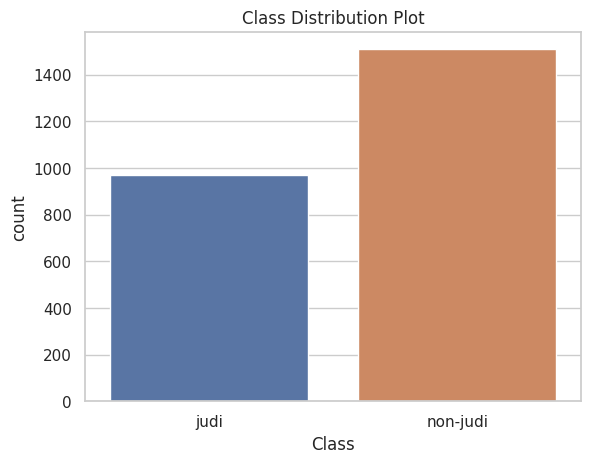

In [12]:
# Menghitung jumlah dan persentase untuk setiap kelas
n_judi = df[df['Class'] == 'judi']['Class'].count()
n_non_judi = df[df['Class'] != 'judi']['Class'].count()  # Selain 'judi'
percent_judi = (n_judi / (n_judi + n_non_judi)) * 100
percent_non_judi = (n_non_judi / (n_judi + n_non_judi)) * 100

# Menampilkan hasil
print('Judi')
print('Count: ', n_judi)
print('Percentage: ', percent_judi)
print('===============')
print('Non judi')
print('Count: ', n_non_judi)
print('Percentage: ', percent_non_judi)
print('\n')

# Visualisasi distribusi kelas
sns.countplot(x=df['Class'])
plt.title('Class Distribution Plot')
plt.show()

Character Distribution in Text


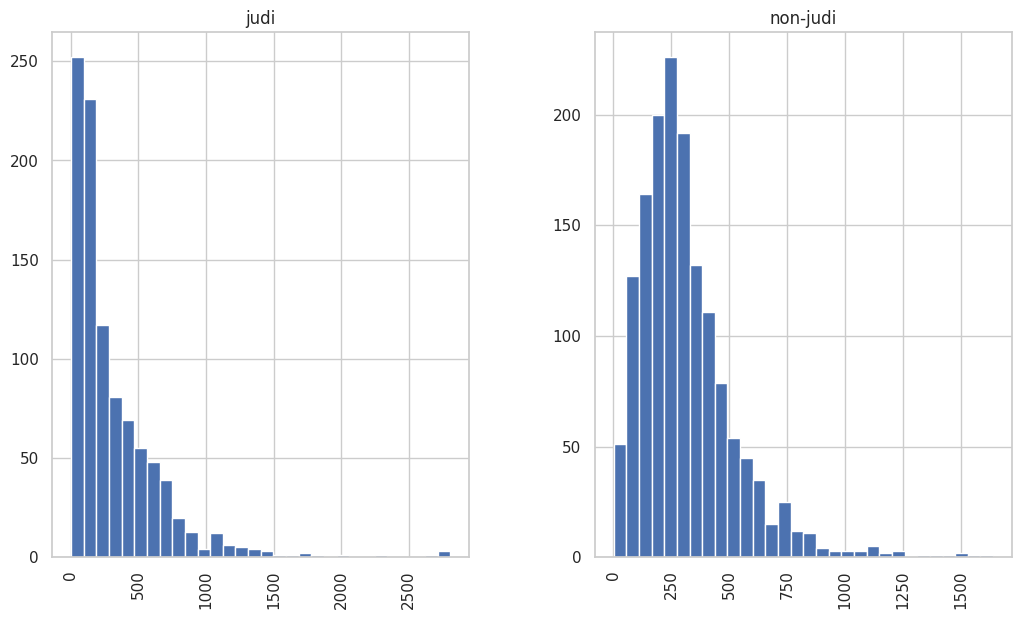

In [13]:
df['char_length'] = df['Extracted Text'].apply(len)
df.hist(column='char_length', by='Class', bins=30, figsize=(12,7))
print('Character Distribution in Text')
plt.show()

## Modelling

In [14]:
# Install necessary packages
!pip install -U datasets torch_optimizer evaluate accelerate transformers tensorflow

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.9/55.9 kB 1.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.4/44.4 kB 3.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.9/61.9 kB 4.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.0/84.0 kB 5.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 336.6/336.6 kB 13.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.7/9.7 MB 70.9 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 615.3/615.3 MB 2.8 MB/s eta 0:00:000:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 106.9 MB/s eta 0:00:0000:01
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.17.1
    Uninstalling tensorboard-2.17.1:
      Successfully uninstalled tensorboard-2.17.1
  Attempting uninstall: transformers
    Found existing installation: transformers 4.47.0
    Uninstalling transformers-4.47.0:
      Successfully uninstalled transf

In [22]:
# Import required libraries
import torch
import torch_optimizer as optim
import numpy as np
from sklearn.metrics import classification_report
from datasets import Dataset, DatasetDict
from transformers import AutoTokenizer, AutoModelForSequenceClassification, Trainer, TrainingArguments, DataCollatorWithPadding
import evaluate
import os
import shutil

In [23]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using {device} device")

Using cuda device


In [24]:
# Disable wandb
os.environ['WANDB_DISABLED'] = 'true'

# Load evaluation metrics
accuracy_metric = evaluate.load('accuracy')
f1_metric = evaluate.load('f1')
precision_metric = evaluate.load('precision')
recall_metric = evaluate.load('recall')

# Computation metrics function
def compute_metrics(eval_pred):
    logits, labels = eval_pred
    predictions = np.argmax(logits, axis=-1)
    accuracy = accuracy_metric.compute(predictions=predictions, references=labels)
    f1 = f1_metric.compute(predictions=predictions, references=labels, average='weighted')
    precision = precision_metric.compute(predictions=predictions, references=labels, average='weighted')
    recall = recall_metric.compute(predictions=predictions, references=labels, average='weighted')
    return {**accuracy, **f1, **precision, **recall}

# Function for tokenization
def tokenization(example):
    return tokenizer(example['cleaned_text'], padding=True, truncation=True, max_length=128)

# Saving and zipping files
def save_file(zip_name, dir_name):
    shutil.make_archive(zip_name, 'zip', dir_name)
    return 'file saved & zipped!'

# Define evaluation dataframe
eval_df = pd.DataFrame(columns=['Model', 'Optimizer', 'Training Loss', 'Training Runtime (s)', 'Evaluation Loss', 'Evaluation Runtime (s)', 'Evaluation Accuracy', 'Evaluation F1'])

In [33]:
pre_df['Class'] = pre_df['Class'].apply(lambda x: 1 if x == 'judi' else 0)
pre_df.head()

,Extracted Text,Class,cleaned_text
0,HOME jackpotpartycasinoslotsonline — login pr...,1,home login bigwin jackpot codes
1,r #TOGrt AFATC Situs Online Gaming Terbaik Un...,1,situs online gaming terbaik untuk gamers langs...
2,"""€! INFO TERKINI: (TOGEL ONLINE TERBESAR DAN T...",1,info terkini togel online terbesar dan terpeca...
3,Sa TIPE Nomor Ab sernncan 2 Sa HADIAHTOGEL —— ...,1,tipe nomor mimpi imei referral ieee hubungi kami
4,bet 365 keluaran togel hongkong kemarin HOME ...,1,bet keluaran togel hongkong kemarin home apk t...


In [34]:
textdf = pre_df[['cleaned_text', 'Class']]
textdf

,cleaned_text,Class
0,home login bigwin jackpot codes,1
1,situs online gaming terbaik untuk gamers langs...,1
2,info terkini togel online terbesar dan terpeca...,1
3,tipe nomor mimpi imei referral ieee hubungi kami,1
4,bet keluaran togel hongkong kemarin home apk t...,1
...,...,...
2564,home beli paket try out new blog mau belajar a...,0
2565,jakarta cari harga spek dan lainnya akarta bah...,0
2566,flash sale and save use code vip days hours ma...,0
2567,search names categories simulation show all to...,0


In [35]:
dataset = Dataset.from_pandas(textdf, preserve_index=False)
dataset

Dataset({
    features: ['cleaned_text', 'Class'],
    num_rows: 2479
})

In [36]:
# Split dataset into train, validation, and test sets
train_test_dataset = dataset.train_test_split(test_size=0.2, seed=42, shuffle=True)
val_test_dataset = train_test_dataset['test'].train_test_split(test_size=0.5, seed=42, shuffle=True)

# Create DatasetDict
dataset = DatasetDict({
    'train': train_test_dataset['train'],
    'val': val_test_dataset['train'],
    'test': val_test_dataset['test'],
})

In [37]:
# Rename column "Class" to "labels"
dataset = dataset.rename_column("Class", "labels")

In [1]:
# Load IndoBERT tokenizer and model
checkpoint = 'indobenchmark/indobert-base-p2'
tokenizer = AutoTokenizer.from_pretrained(checkpoint, use_fast=True)
model = AutoModel.from_pretrained(checkpoint, num_labels=2, id2label={0:'Non Judi',1:'Judi'}, label2id={'Non Judi':0,'Judi':1})

NameError: name 'AutoTokenizer' is not defined

In [39]:
# Tokenize dataset
tokenized_dataset = dataset.map(tokenization, batched=True)

# Data collator
data_collator = DataCollatorWithPadding(tokenizer=tokenizer)

Map:   0%|          | 0/1983 [00:00<?, ? examples/s]

Map:   0%|          | 0/248 [00:00<?, ? examples/s]

Map:   0%|          | 0/248 [00:00<?, ? examples/s]

In [40]:
# Define training arguments
training_args = TrainingArguments(
    seed=42,
    output_dir='./results',
    num_train_epochs=10,
    learning_rate=1e-5,
    per_device_train_batch_size=16,
    per_device_eval_batch_size=16,
    evaluation_strategy='epoch',
    save_strategy='epoch',
    load_best_model_at_end=True,
    logging_dir='./logs',
    logging_steps=10,
    report_to="none",
)

In [41]:
#  Initialize Trainer
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=tokenized_dataset['train'],
    eval_dataset=tokenized_dataset['val'],
    tokenizer=tokenizer,
    data_collator=data_collator,
    compute_metrics=compute_metrics,
)

# Train the model
trainer.train()

Epoch,Training Loss,Validation Loss,Accuracy,F1,Precision,Recall
1,0.221200,0.068207,0.979839,0.979863,0.979922,0.979839
2,0.086800,0.057062,0.979839,0.979910,0.980287,0.979839
3,0.058700,0.058647,0.971774,0.971739,0.971738,0.971774
4,0.036700,0.073310,0.971774,0.971874,0.972277,0.971774
5,0.020900,0.071071,0.979839,0.979813,0.979823,0.979839
6,0.008400,0.078750,0.971774,0.971809,0.971877,0.971774
7,0.016400,0.084238,0.975806,0.975806,0.975806,0.975806
8,0.017000,0.089990,0.975806,0.975864,0.976058,0.975806
9,0.009400,0.090951,0.979839,0.979910,0.980287,0.979839
10,0.008900,0.090840,0.971774,0.971809,0.971877,0.971774


TrainOutput(global_step=620, training_loss=0.05342764853229446, metrics={'train_runtime': 320.5367, 'train_samples_per_second': 61.865, 'train_steps_per_second': 1.934, 'total_flos': 1181691874609020.0, 'train_loss': 0.05342764853229446, 'epoch': 10.0})